### <font color='289C4E'>İçindekiler</font><a class='anchor' id='top'></a>
- [Section 1: İş Probleminin Tanımı](#1)
- [Section 2: Veri Keşfi ve Ön İşleme](#2)
- [Section 3: Veri Analizi ve Görselleştirme](#3)
- [Section 4: Modelleme ve Değerlendirme](#4)

---

### <font color='289C4E'>Section 1: İş Probleminin Tanımı</font><a class='anchor' id='1'></a>

Bu proje, belirli bir ürünün fiyatını tahmin etmek amacıyla geliştirilmiştir. Ürünün fiyatları, özelliklerine, kategorisine, üretim yerine, satış yapıldığı market ve şehir gibi faktörlere bağlı olarak değişiklik göstermektedir. Amaç, verilen eğitim verisi üzerinden ürün fiyatlarını tahmin etmek ve test verisi için tahmin edilen fiyatlarla ilgili doğru sonuçlar elde etmektir.

**Veri Dosyaları:**  
- **train.csv:** Eğitim seti, ürün özellikleri ve fiyatlarının bulunduğu veri dosyasıdır.  
- **testFeatures.csv:** Test seti, ürün özellikleri yer almakta olup, bu dosyadaki ürünler için fiyat tahmini yapılması beklenmektedir.  
- **sample_submission.csv:** Örnek dosya yükleme formatı, test setindeki tüm ürünler için tahminlerinizi yüklemeniz gereken formatı göstermektedir.

**Veri İçeriği:**  
Eğitim ve test verilerindeki her ürün için aşağıdaki bilgiler bulunmaktadır:
- **Tarih:** Ürünün özelliklerinin belirlendiği tarih.  
- **Ürün:** Ürünün ismi.  
- **Ürün Besin Değeri:** Ürünün sahip olduğu besin değeri.  
- **Ürün Kategorisi:** Ürünün ait olduğu kategori.  
- **Ürün Fiyatı:** Ürünün fiyatı (sadece eğitim setinde mevcut).  
- **Ürün Üretim Yeri:** Ürünün üretildiği yer.  
- **Market:** Ürünün satıldığı market.  
- **Şehir:** Ürünün satıldığı şehir.

**Hedef:** Bu proje, test verisindeki ürünler için fiyat tahminleri yapmayı ve tahmin edilen fiyatların doğruluğunu en üst seviyeye çıkarmayı amaçlamaktadır.

---

### <font color='289C4E'>Section 2: Veri Keşfi ve Ön İşleme</font><a class='anchor' id='2'></a>
Train verisi 227520 gözlem ve 8 özellikten,\
Test verisi 45504 gözlem ve 8 özellikten oluşmaktadır.\
Bu özellikler gözlemin elde edildiği tarih, ürünün ne olduğu, ürün besin değeri, ürün kategorisi, ürün fiyatı, ürün üretim yeri, market tipi ve şehir detaylarını içermektedir.\
\
**İlgili Kütüphanelerin Dahili:** Analiz ve ileriyi tahminleme için gerekli kütüphaneler dahil edildi.\
**Veri Okuma ve Betimsel İstatistik Çıkarımı:** Veriler csv formatında okundu ve betimsel istatistikleri çıkartılarak incelendi.


#### <font color='289C4E'>Kütüphanelerin Dahil Edilmesi ve Verinin Okunması</font>

In [187]:
# Temel veri işleme kütüphaneleri
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt

# Modelleme ve optimizasyon araçları
import lightgbm as lgb
import optuna

# Model değerlendirme ve veri bölme
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Kategorik veri dönüştürme
from sklearn.preprocessing import LabelEncoder

In [188]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('testFeatures.csv')
test_data.drop('id', axis=1, inplace=True)

#### <font color='289C4E'>Veri Setindeki Ürün Türleri</font>

In [189]:
train_data['ürün'].unique()

array(['kıyma', 'tavuk', 'hindi', 'Bakla-kuru', 'Bakla-taze', 'Bamya',
       'Barbunya-kuru', 'Bezelye-taze', 'Biber-yeşil', 'Brüksel laha.',
       'Domates', 'Enginar', 'Fasulye-kuru', 'Fasulye-taze', 'Havuç',
       'Salatalık', 'Ispanak', 'Kabak', 'Karnabahar', 'Kereviz-baş',
       'Kırmızı-pancar', 'Lahana', 'Mantar', 'Marul', 'Mercimek-kuru',
       'Nohut', 'Pancar', 'Patates', 'Patlıcan', 'Pazı', 'Pırasa',
       'Semizotu', 'Buğday ekmeği', 'Bulgur', 'Erişte', 'Makarna',
       'Mısır', 'Mısır unu', 'Nişasta', 'Pilav', 'Pirinç unu', 'Şehriye',
       'Tarhana', 'Yulaf unu', 'yumurta', 'beyaz peynir', 'Kaşar peyniri',
       'krema', 'yoğurt', 'sucuk', 'salam', 'sosis', 'tam buğday ekmek',
       'kaymak', 'bal', 'tereyağ', 'Armut', 'Çilek', 'Elma',
       'Erik türleri', 'İncir', 'Karadut', 'Karpuz', 'Kavun', 'Kayısı',
       'Kiraz', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Portakal', 'Şeftali',
       'Üzüm', 'Vişne', 'fındık', 'fıstık', 'kaju', 'badem', 'ceviz'],
      dtype=

#### <font color='289C4E'>Veri Setinin Genel Yapısını Öğrenmek İçin Veri Setindeki İlk 3 Satır</font>

In [190]:
print(train_data.head(3))

        tarih   ürün  ürün besin değeri ürün kategorisi  ürün fiyatı  \
0  2019-01-01  kıyma                120              et        32.70   
1  2019-01-01  tavuk                103              et        11.04   
2  2019-01-01  hindi                160              et        11.20   

  ürün üretim yeri market şehir  
0         Yurt içi      K     S  
1         Yurt içi      K     S  
2         Yurt içi      K     S  


#### <font color='289C4E'>Boyut İncelemesi ve Karşılaştırma</font>


In [191]:
print(f"""
Train verisi boyutu: {train_data.shape}
Test verisi boyutu: {test_data.shape}

Train verisi özellik isimleri:\n{train_data.columns.tolist()}\n
Test verisi özellik isimleri:\n{test_data.columns.tolist()}
""")


Train verisi boyutu: (227520, 8)
Test verisi boyutu: (45504, 7)

Train verisi özellik isimleri:
['tarih', 'ürün', 'ürün besin değeri', 'ürün kategorisi', 'ürün fiyatı', 'ürün üretim yeri', 'market', 'şehir']

Test verisi özellik isimleri:
['tarih', 'ürün', 'ürün besin değeri', 'ürün kategorisi', 'ürün üretim yeri', 'market', 'şehir']



#### <font color='289C4E'>Eksik Değer İncelemesi</font>

In [192]:
train_data.isnull().sum()

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

In [193]:
test_data.isnull().sum()

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

#### <font color='289C4E'>Aykırı Değer İncelemesi</font>

In [194]:
def num_summary(df, column, plot=True):
    if not plot:
        return df[column].describe()
    
    print(f"{column} Özet İstatistikler:")
    print(df[column].describe())
    print(f"Çarpıklık (Skewness): {df[column].skew():.2f}")
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Ürün Besin Değeri Kutu Grafiği')
    plt.xlabel("Ürün Besin Değeri")
    
    plt.subplot(2, 2, 2)
    sns.histplot(df[column], kde=True, color='skyblue', bins=50)
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 3.0 * IQR)
    upper_bound = min(df[column].max(), Q3 + 3.0 * IQR)
    
    plt.axvline(x=lower_bound, color='red', linestyle='--', linewidth=2, label='Aykırı Değer Sınırları')
    plt.axvline(x=upper_bound, color='red', linestyle='--', linewidth=2)
    
    plt.title(f'Ürün Besin Değeri Histogramı')
    plt.xlabel("Ürün Besin Değeri")
    plt.ylabel('Tekrar Sayısı')
    x_min, x_max = df[column].min(), df[column].max()
    plt.xticks(np.arange(np.floor(x_min / 25) * 25, np.ceil(x_max / 25) * 25 + 25, 25))
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Alt Aykırı Değer Sayısı: {sum(df[column] < lower_bound)}")
    print(f"Üst Aykırı Değer Sayısı: {sum(df[column] > upper_bound)}")

ürün besin değeri Özet İstatistikler:
count    227520.000000
mean        143.113924
std         133.218871
min           8.000000
25%          41.000000
50%          83.000000
75%         250.000000
max         402.000000
Name: ürün besin değeri, dtype: float64
Çarpıklık (Skewness): 0.89


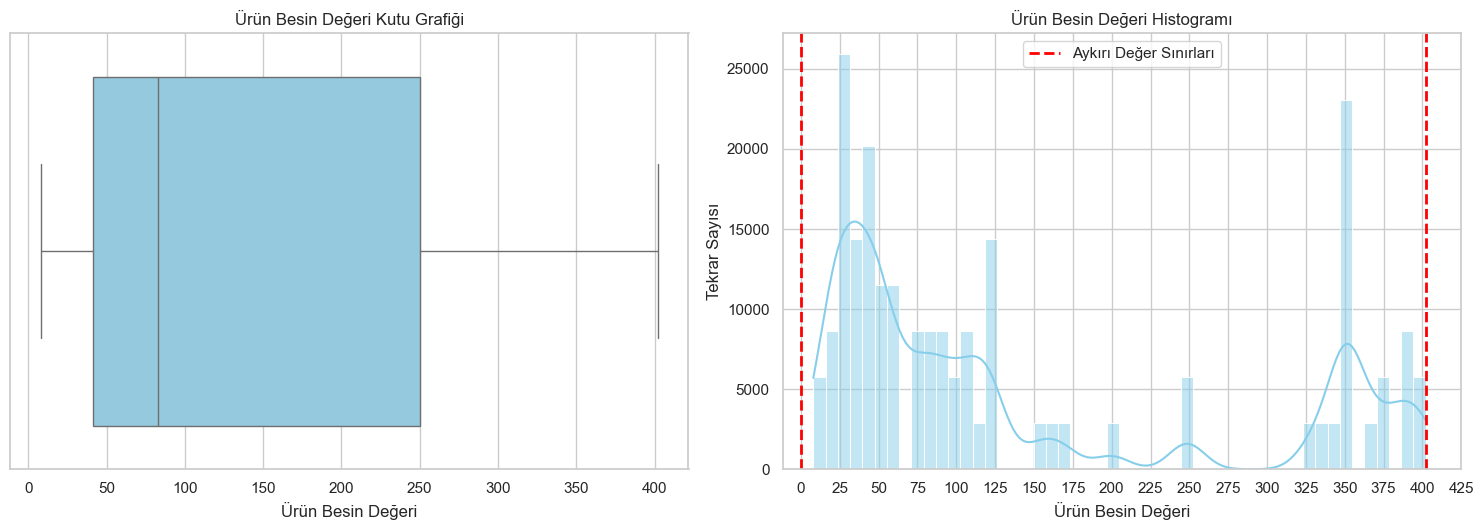

Alt Aykırı Değer Sayısı: 0
Üst Aykırı Değer Sayısı: 0


In [195]:
num_summary(train_data, "ürün besin değeri", plot=True)

###### <font color='289C4E'>Ürün Fiyatı Değişkeninde Verinin %75'indeki noktası ile %100'ü arasındaki değerlerin fazlalığı sebebiyle aykırı değişkenlere dokunulmamıştır.</font>

ürün fiyatı Özet İstatistikler:
count    227520.000000
mean         17.018837
std          14.470524
min           0.740000
25%           7.380000
50%          12.860000
75%          21.630000
max         164.530000
Name: ürün fiyatı, dtype: float64
Çarpıklık (Skewness): 2.35


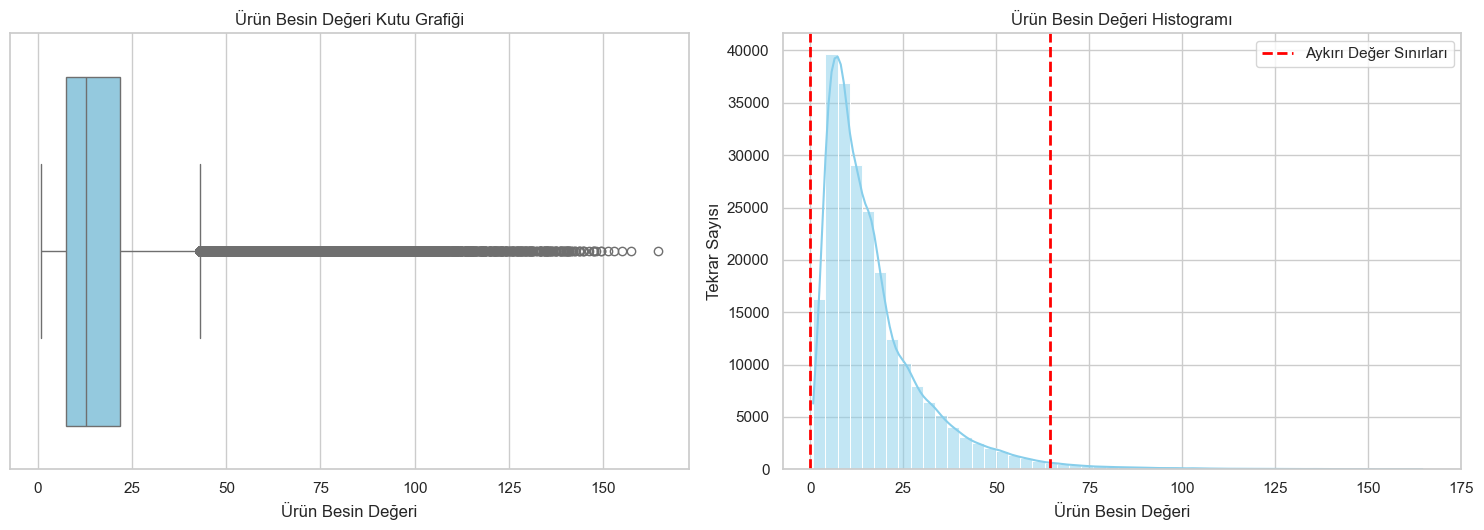

Alt Aykırı Değer Sayısı: 0
Üst Aykırı Değer Sayısı: 3248


In [196]:
num_summary(train_data, "ürün fiyatı", plot=True)

### <font color='289C4E'>Section 3: Veri Analizi&İşleme ve Görselleştirme</font><a class='anchor' id='3'></a>

Veri setindeki ana özelliklerin keşfi için çeşitli görselleştirmeler yapılmıştır.


##### <font color='289C4E'>Kategorik Özellik Analizi (Ürün Kategorisi ve Şehir Bazında Ortalama Fiyat)</font>

/var/folders/f5/4fp1cnf16_j64dw48x9hk7hh0000gn/T/ipykernel_19256/1244776713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_price.values, y=category_price.index, palette='viridis')
/var/folders/f5/4fp1cnf16_j64dw48x9hk7hh0000gn/T/ipykernel_19256/1244776713.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_price.values, y=city_price.index, palette='magma')


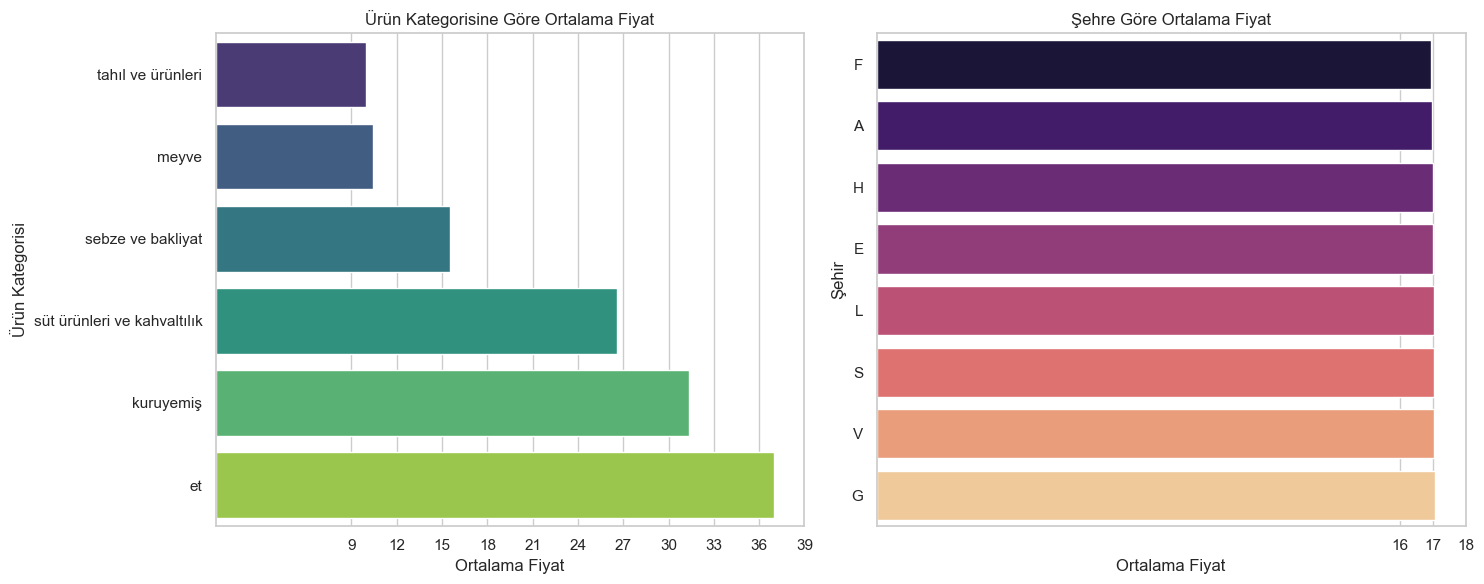

In [197]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
category_price = train_data.groupby('ürün kategorisi')['ürün fiyatı'].mean().sort_values()
sns.barplot(x=category_price.values, y=category_price.index, palette='viridis')
plt.title('Ürün Kategorisine Göre Ortalama Fiyat')
plt.xlabel('Ortalama Fiyat')
plt.ylabel('Ürün Kategorisi')
x_min, x_max = category_price.min(), category_price.max()
plt.xticks(np.arange(np.floor(x_min / 3) * 3, np.ceil(x_max / 3) * 3 + 3, 3))

plt.subplot(1, 2, 2)
city_price = train_data.groupby('şehir')['ürün fiyatı'].mean().sort_values()
sns.barplot(x=city_price.values, y=city_price.index, palette='magma')
plt.title('Şehre Göre Ortalama Fiyat')
plt.xlabel('Ortalama Fiyat')
plt.ylabel('Şehir')
x_min, x_max = city_price.min(), city_price.max()
plt.xticks(np.arange(np.floor(x_min), np.ceil(x_max) + 1, 1))

plt.tight_layout()
plt.show()

##### <font color='289C4E'>Estetik ve anlaşılabilir görsel oluşturma açısından 10 benzersiz değerden fazla değere sahip olan değişkenler, histogram ve frekans değerleri ile görselleştirilmiştir.</font>
##### <font color='289C4E'>10 benzersiz değerden az değere sahip olan değişkenler pasta grafiği ile görselleştirilmiştir</font>

In [198]:
unique_values = {col: train_data[col].nunique() for col in train_data.columns}
unique_values

{'tarih': 60,
 'ürün': 79,
 'ürün besin değeri': 56,
 'ürün kategorisi': 6,
 'ürün fiyatı': 8554,
 'ürün üretim yeri': 2,
 'market': 3,
 'şehir': 8}

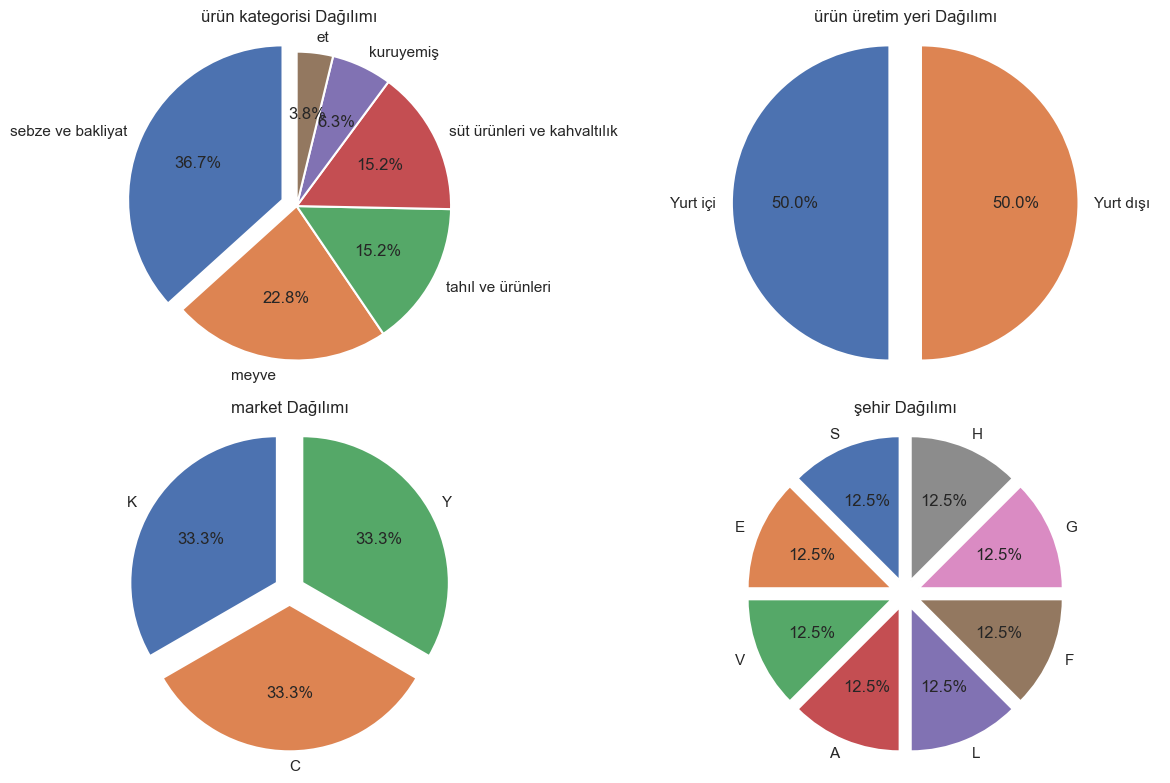

In [199]:
# İncelenecek sütunlar listesi
sutunlar = ['ürün kategorisi', 'ürün üretim yeri', 'market', 'şehir']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

# Her sütun için pie chart
for i, sutun in enumerate(sutunlar):
    sayim = train_data[sutun].value_counts()
    max_index = sayim.idxmax()
    max_value = sayim[max_index]
    
    # Eşit olanlar varsa, onlar için explode değeri 0 olur
    explode = [0.1 if val == max_value else 0 for val in sayim.values]
    
    # Pie chart
    axs[i].pie(sayim.values, labels=sayim.index, autopct='%1.1f%%', startangle=90, explode=explode,
            wedgeprops={'linewidth': 1.5, 'linestyle': 'solid'})  # Kenar çizgisi
    axs[i].set_title(f'{sutun} Dağılımı')
    axs[i].axis('equal')

plt.tight_layout()
plt.show()


In [200]:
def col_value_freq(df, column_name):
    """
    Belirtilen sütundaki eşsiz (unique) değerlerin frekans oranlarını hesaplayıp döndüren fonksiyondur.
    
    Parametreler:
        df (pd.DataFrame): İşlem yapılacak pandas DataFrame nesnesi.
        column_name (str): Frekans analizi yapılacak sütunun adı.
        
    Dönüş:
        pd.DataFrame: İlk sütunda eşsiz değerler, ikinci sütunda ise bu değerlerin frekans oranları (yüzdelik) yer alır.

    Not:
        Eğer tüm benzersiz değerler eşit oranda dağılıyorsa kullanıcıya bilgi verir.
    """
    frequency = df[column_name].value_counts(normalize=True).reset_index()
    frequency.columns = [column_name, 'frequency']
    
    frequency['frequency'] = frequency['frequency']

    if frequency['frequency'].nunique() == 1:
        print(f"{column_name.upper()} isimli değişkenin tüm benzersiz değerleri \n{frequency['frequency'][0]}\nolasılıkla eşit dağılmış durumdadır.")
    
    return frequency

In [201]:
def num_summary(dataframe, numerical_col, plot=False):
    """
    Belirtilen sayısal sütun için temel istatistiksel özetleri ve isteğe bağlı olarak
    histogram + ortalama çizgisini gösterir.

    Parametreler:
        dataframe (pd.DataFrame): Analiz yapılacak pandas DataFrame nesnesi.
        numerical_col (str): Özet istatistikleri çıkarılacak sayısal sütun adı.
        plot (bool): True ise histogram ve ortalama çizgisi görselleştirilir. (varsayılan: False)

    İşlev:
        - count, mean, std, min, %50 (median), max gibi temel özetleri yazdırır.
        - Histogram üzerinde ortalama değeri kırmızı dikey çizgi olarak gösterir.
    """
    # Temel istatistiksel özetler (describe ile)
    quantiles = [0.25, 0.50, 0.75]
    summary_df = pd.DataFrame(dataframe[numerical_col].describe(quantiles)).T
    display(summary_df)

    # Görselleştirme
    if plot:
        mean_val = dataframe[numerical_col].mean()
        plt.figure(figsize=(8, 4))
        plt.hist(dataframe[numerical_col], bins=30, color='skyblue', edgecolor='black')
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Ortalama: {mean_val:.2f}')
        plt.xlabel(numerical_col)
        plt.title(f"{numerical_col} Dağılımı ve Ortalama")
        plt.legend()
        plt.show()

In [202]:
col_value_freq(train_data,"ürün")

ÜRÜN isimli değişkenin tüm benzersiz değerleri 
0.012658227848101266
olasılıkla eşit dağılmış durumdadır.


,ürün,frequency
0,kıyma,0.012658
1,salam,0.012658
2,Çilek,0.012658
3,Armut,0.012658
4,tereyağ,0.012658
...,...,...
74,Nohut,0.012658
75,Mercimek-kuru,0.012658
76,Marul,0.012658
77,Mantar,0.012658


,count,mean,std,min,25%,50%,75%,max
ürün besin değeri,227520.0,143.113924,133.218871,8.0,41.0,83.0,250.0,402.0


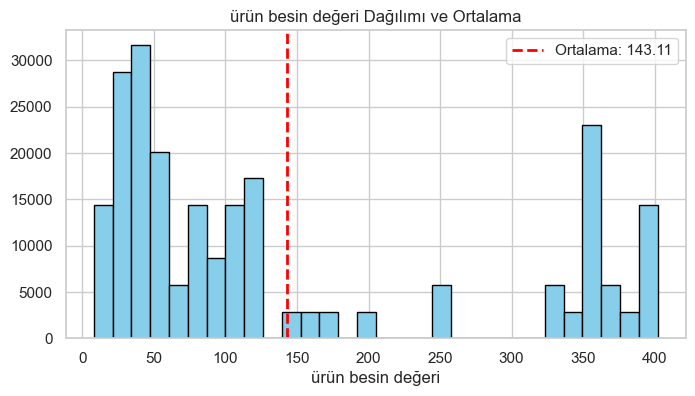

In [203]:
num_summary(train_data,"ürün besin değeri", plot=True)

,count,mean,std,min,25%,50%,75%,max
ürün fiyatı,227520.0,17.018837,14.470524,0.74,7.38,12.86,21.63,164.53


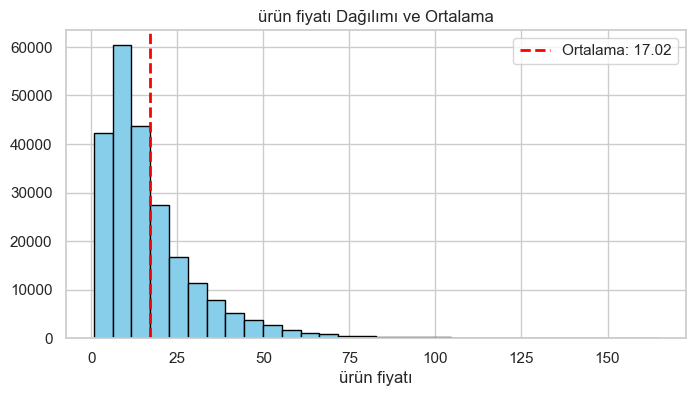

In [204]:
num_summary(train_data,"ürün fiyatı", plot=True)

##### <font color='289C4E'>Verilerdeki Sayısal Özelliklerin Korelasyon Isı Haritası</font>


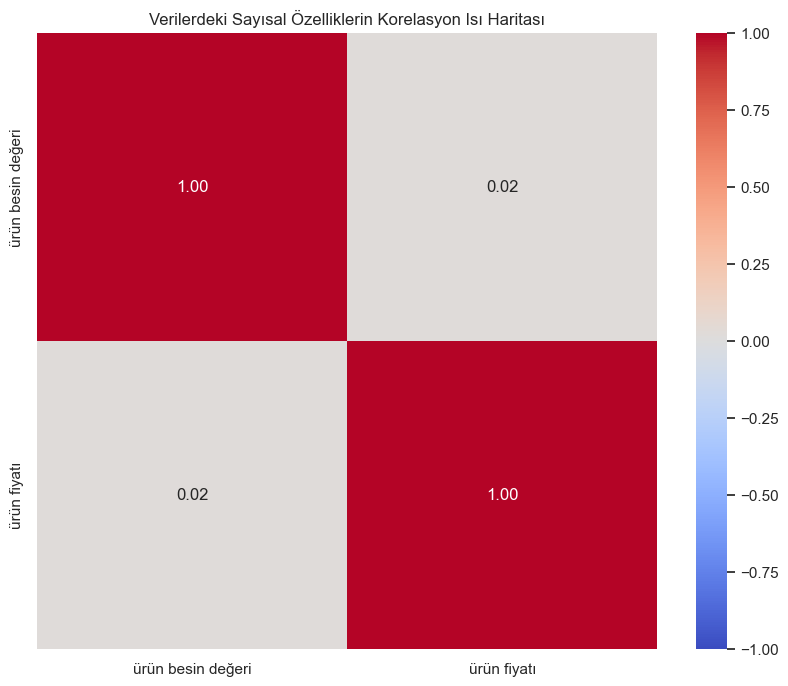

In [205]:
plt.figure(figsize=(10, 8))
numerical_cols = ['ürün besin değeri', 'ürün fiyatı']
corr_matrix = train_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Verilerdeki Sayısal Özelliklerin Korelasyon Isı Haritası')
plt.show()

##### <font color='289C4E'>Ürün Besin Değeri ve Fiyat İlişkisi</font>


Ürün besin değeri ile fiyat değişimi arasında herhangi bir doğru veya ters orantı yoktur.

/var/folders/f5/4fp1cnf16_j64dw48x9hk7hh0000gn/T/ipykernel_19256/496906760.py:25: UserWarning: Glyph 8378 (\N{TURKISH LIRA SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8378 (\N{TURKISH LIRA SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


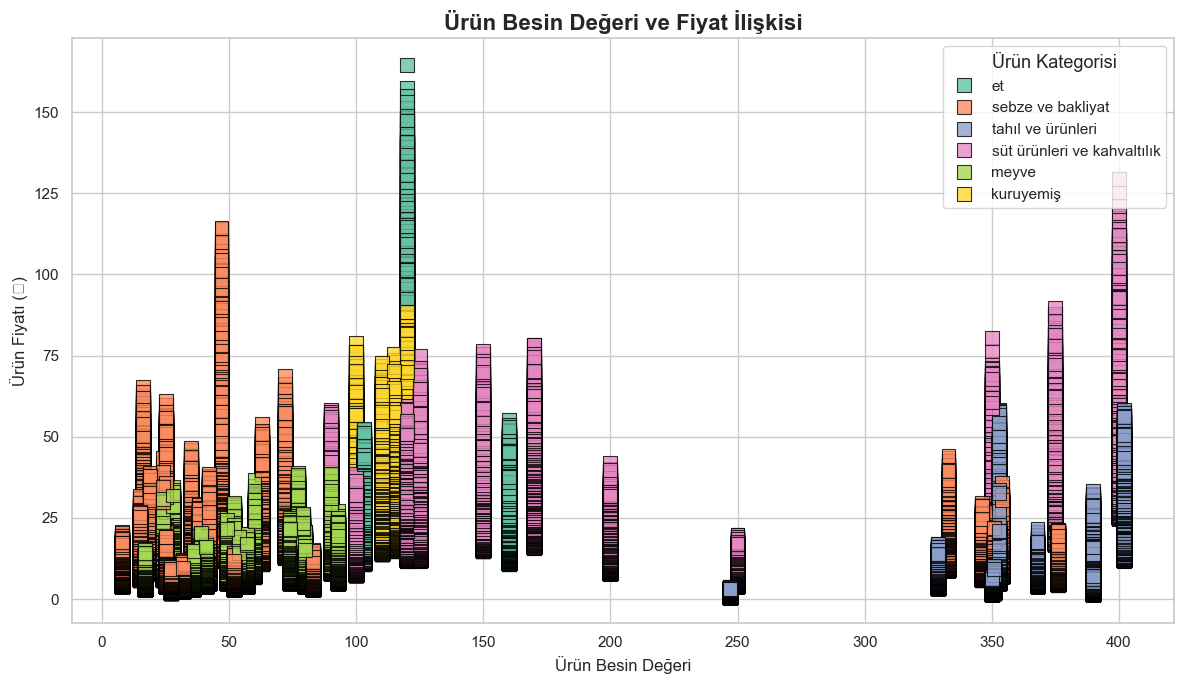

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# scatterplot'a marker şekli ekledik
scatter = sns.scatterplot(
    data=train_data,
    x='ürün besin değeri',
    y='ürün fiyatı',
    hue='ürün kategorisi',
    palette='Set2',
    marker='s',  # Kare işaretleyici
    s=100,
    edgecolor='black',
    alpha=0.8
)

plt.title('Ürün Besin Değeri ve Fiyat İlişkisi', fontsize=16, fontweight='bold')
plt.xlabel('Ürün Besin Değeri', fontsize=12)
plt.ylabel('Ürün Fiyatı (₺)', fontsize=12)
plt.legend(title='Ürün Kategorisi', title_fontsize='13', fontsize='11', loc='upper right')

plt.tight_layout()
plt.show()


##### <font color='289C4E'>Şehir ve Market Bazında Fiyatlar</font>

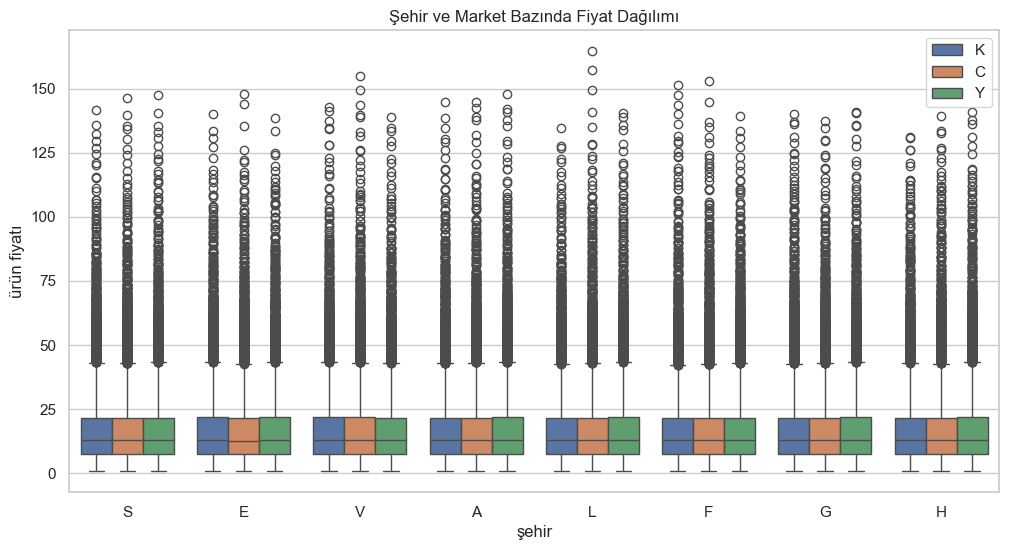

In [207]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='şehir', y='ürün fiyatı', hue='market')
plt.title('Şehir ve Market Bazında Fiyat Dağılımı')
plt.legend(loc='upper right')
plt.show()

### <font color='289C4E'>Section 4: Modelleme ve Değerlendirme</font><a class='anchor' id='4'></a>


##### <font color='289C4E'>Kukla Değişken Dönüşümü</font>

<font color='289C4E'>Görselleştirme kısmında kolaylık olsun diye dönüştürme işlemi görselleştirme adımından sonra yapılmıştır.</font>

In [208]:
def convert_to_dummies(df, cols):
    """
    Verilen kategorik sütunları dummy değişkenlere (0-1 formatında) dönüştürür.
    
    Parametreler:
        df (pd.DataFrame): İşlem yapılacak pandas DataFrame nesnesi.
        cols (list): Dummy'ye dönüştürülecek sütun adlarının listesi.
    
    Dönüş:
        Tuple:
            - Yeni DataFrame (pd.DataFrame): Dummy sütunlara dönüştürülmüş hali.
            - dropped (dict): Her bir sütunda dummy oluşturulurken atılan (drop_first=True) ilk kategorik değeri gösterir.
    
    Özellikler:
        - İlk kategori referans alınarak düşürülür (multicollinearity'yi önlemek için).
        - Yeni dummy sütunlar sadece 0 ve 1 değerlerinden oluşur.
    """
    dropped = {}
    for col in cols:
        unique_vals = sorted(df[col].dropna().unique())
        if unique_vals:
            dropped[col] = unique_vals[0]

    df = pd.get_dummies(df, columns=cols, drop_first=True)

    dummy_cols = [col for col in df.columns if any(prefix + '_' in col for prefix in cols)]
    df[dummy_cols] = df[dummy_cols].astype(int)

    return df, dropped

In [209]:
categorical_columns = ["ürün", "ürün kategorisi", "ürün üretim yeri", "market", "şehir"]

train_data, dropped_values = convert_to_dummies(train_data, categorical_columns)
test_data, dropped_values_t = convert_to_dummies(test_data, categorical_columns)

print("\n⬇️ Drop_first=True ile düşen kategoriler:")
for col, val in dropped_values.items():
    print(f"{col}: '{val}'")


⬇️ Drop_first=True ile düşen kategoriler:
ürün: 'Armut'
ürün kategorisi: 'et'
ürün üretim yeri: 'Yurt dışı'
market: 'C'
şehir: 'A'


In [210]:
# Hedef değişkenin adı
target = 'ürün fiyatı'

# Test verisindeki ID bilgilerini yedekle (çıktı dosyasında kullanılacak)
test_ids = pd.Series(test_data.index)

# Eğitim verisinden hedef sütunu çıkar, ardından test verisiyle birleştir
# Bu işlem tüm verilerde aynı encoding işlemini uygulayabilmek için yapılır
train_features = train_data.drop(columns=[target])
all_data = pd.concat([train_features, test_data], axis=0)

# Kategorik sütunları label encoding ile sayısallaştır
# Not: LightGBM native olarak kategorik desteklese de, burada manuel encode tercih edilmiş
categorical_cols = all_data.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    all_data[col] = le.fit_transform(all_data[col].astype(str))

# Eğitim ve test setlerini tekrar ayır
X_all = all_data
X_train = X_all.iloc[:len(train_data), :]
X_test = X_all.iloc[len(train_data):, :]
y_train = train_data[target]

# Eğitim verisini train/validation olarak böl (modelin doğruluğunu izlemek için)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# LightGBM modeli oluştur ve validation seti üzerinde ilk RMSE'yi hesapla
model = lgb.LGBMRegressor()
model.fit(X_train_split, y_train_split)

y_val_pred = model.predict(X_val_split)
rmse = root_mean_squared_error(y_val_split, y_val_pred)
print(f'Validation RMSE: {rmse:.2f}')

# Optuna için objective function tanımlanır
# Amaç: RMSE'yi minimize eden en iyi LightGBM hiperparametrelerini bulmak
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'random_state': 42,
        'n_estimators': 1000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train_split, y_train_split,
        eval_set=[(X_val_split, y_val_split)]
    )

    preds = model.predict(X_val_split)
    rmse = root_mean_squared_error(y_val_split, y_val_pred)
    return rmse

# Optuna optimizasyonunu başlat
# Amaç: 10 denemeyle (trial) en düşük RMSE’yi veren parametre kombinasyonunu bulmak
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10, n_jobs=-1)

# En iyi sonucu ve parametreleri yazdır
print("Best RMSE:", study.best_value)
print("Best params:", study.best_params)

# Bulunan en iyi parametrelerle tüm eğitim verisi üzerinden modeli yeniden eğit
best_model = lgb.LGBMRegressor(**study.best_params, n_estimators=1000, random_state=42)
best_model.fit(X_train, y_train)

# Özellik önemini çıkar (feature importance) ve en önemli 6 özelliği belirle
importance = best_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Modeli yalnızca en önemli 6 özellikle yeniden eğit
best_model.fit(X_train[importance_df.head(6)['Feature']], y_train)

# Test seti için tahmin yap (sadece en önemli 6 feature ile)
y_test_pred = best_model.predict(X_test[importance_df.head(6)['Feature']])

# Aylık %1.05 oranında artış uygulanacak
monthly_increase_rate = 0.0105

# Test setindeki tarih bilgisine göre ayı çıkar
# Her ay için farklı artış uygulanır
test_dates = test_data['tarih']
test_months = pd.to_datetime(test_dates).dt.month

# Aylık bileşik artış uygulanarak tahminler güncellenir
adjusted_prices = []
for base_price, month in zip(y_test_pred, test_months):
    months_since_jan = month - 1  # Ocak: 0 artış, Şubat: 1 artış...
    adjusted_price = base_price * ((1 + monthly_increase_rate) ** months_since_jan)
    adjusted_prices.append(adjusted_price)

# Tahmin sonuçları DataFrame'e dönüştürülür
submission = pd.DataFrame({
    'id': test_ids,
    'ürün fiyatı': adjusted_prices
})

[I 2025-05-20 13:10:34,177] A new study created in memory with name: no-name-75c5419b-caff-43db-88b5-d3ad6a272185


Validation RMSE: 1.44


[I 2025-05-20 13:10:48,833] Trial 0 finished with value: 1.4362666309699696 and parameters: {'learning_rate': 0.03233658616697972, 'num_leaves': 245, 'max_depth': 3, 'min_child_samples': 57, 'subsample': 0.9906672828139311, 'colsample_bytree': 0.7309050866256471, 'reg_alpha': 4.687574272600172, 'reg_lambda': 3.5099112290757537}. Best is trial 0 with value: 1.4362666309699696.
[I 2025-05-20 13:11:18,483] Trial 5 finished with value: 1.4362666309699696 and parameters: {'learning_rate': 0.03378394505217376, 'num_leaves': 26, 'max_depth': 15, 'min_child_samples': 35, 'subsample': 0.9574689323790349, 'colsample_bytree': 0.9246790433587375, 'reg_alpha': 8.485174910777936, 'reg_lambda': 0.33930485071871574}. Best is trial 0 with value: 1.4362666309699696.
[I 2025-05-20 13:11:29,024] Trial 2 finished with value: 1.4362666309699696 and parameters: {'learning_rate': 0.15567300070291332, 'num_leaves': 30, 'max_depth': 14, 'min_child_samples': 39, 'subsample': 0.8663013834458886, 'colsample_bytree

Best RMSE: 1.4362666309699696
Best params: {'learning_rate': 0.03233658616697972, 'num_leaves': 245, 'max_depth': 3, 'min_child_samples': 57, 'subsample': 0.9906672828139311, 'colsample_bytree': 0.7309050866256471, 'reg_alpha': 4.687574272600172, 'reg_lambda': 3.5099112290757537}


<font color='289C4E'>En önemli 10 değişkenin etkisi görselleştirilmiştir</font>

En önemli 10 özellik:
                      Feature  Importance
0                       tarih        2723
1           ürün besin değeri         409
66                 ürün_kıyma         140
8          ürün_Brüksel laha.         128
39             ürün_Mısır unu          85
34                ürün_Mantar          78
81      ürün kategorisi_meyve          78
6           ürün_Bezelye-taze          75
80  ürün kategorisi_kuruyemiş          74
3             ürün_Bakla-taze          73


/var/folders/f5/4fp1cnf16_j64dw48x9hk7hh0000gn/T/ipykernel_19256/2279937608.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='viridis')


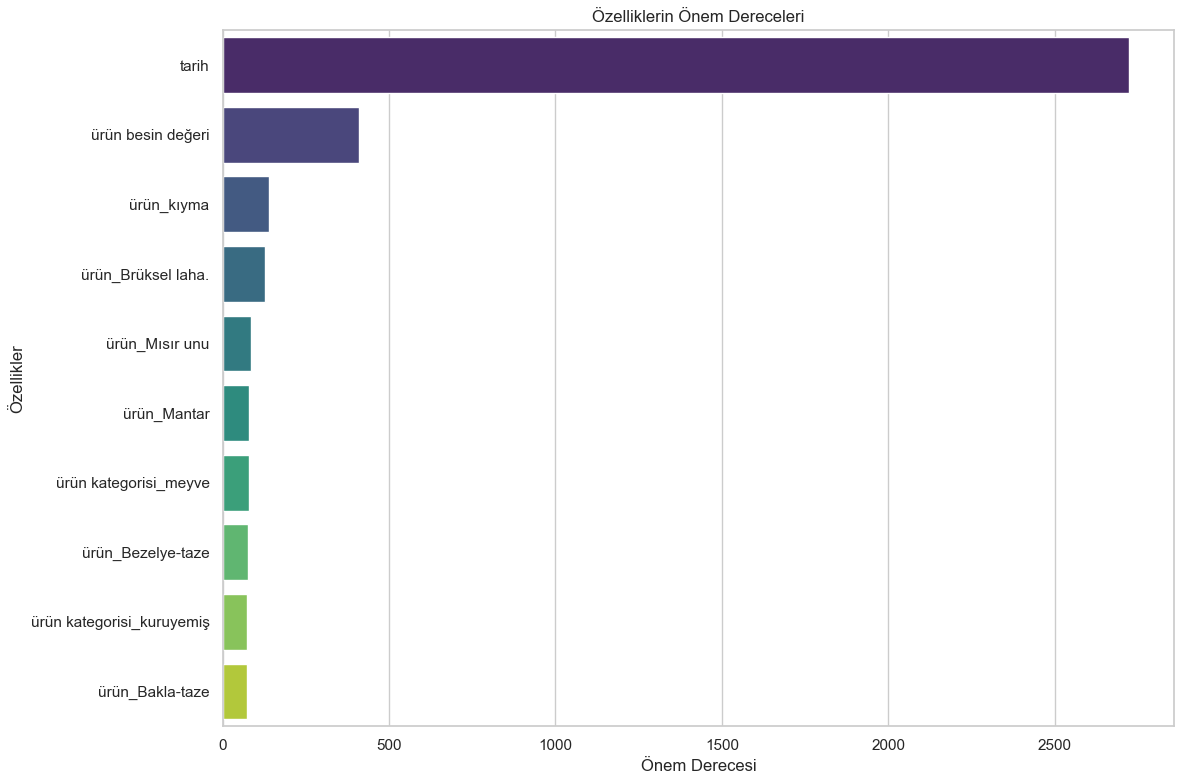

In [213]:
top_features_df = importance_df.head(10)

print("En önemli 10 özellik:")
print(top_features_df[['Feature', 'Importance']])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='viridis')
plt.title('Özelliklerin Önem Dereceleri')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellikler')
plt.tight_layout()
plt.show()
